#  Data Visualization with Haberman Dataset


# 1.1 Basic pacakages and checks

In [103]:
# Importing required packages which I will be using in the EDA.
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
import seaborn as sns;
import os
import warnings;
warnings.filterwarnings("ignore")

In [72]:
# To know the current working directory
os.getcwd()
Data=pd.read_csv("haberman_csv.csv")

In [47]:
# To know how many records are present and how many columns.
print(Data.shape)

(306, 4)


In [48]:
# To print the column name details
print (Data.columns)

Index(['Age_of_patient_at_time_of_operation', 'Patients_year_of_operation',
       'Number_of_positive_axillary_nodes_detected', 'Survival_status'],
      dtype='object')


In [49]:
# To get the Idea of contents of dataset.
Data.head(5)


,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [50]:
Data.describe()

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [51]:
#How many data points for each class are present? 

Data['Survival_status'].value_counts()

1    225
2     81
Name: Survival_status, dtype: int64

# 2 D Scatter plot

Text(0.5, 1.0, 'Age of Patient at time of operation vs Survival Status')

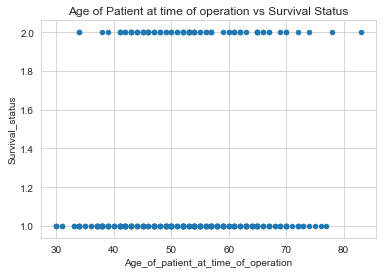

In [112]:
Data.plot(kind='scatter',y='Survival_status',x='Age_of_patient_at_time_of_operation')
plt.title("Age of Patient at time of operation vs Survival Status")


### Observations:
* The positive axillary nodes detected mostly in age range of 35 years to 75 years.


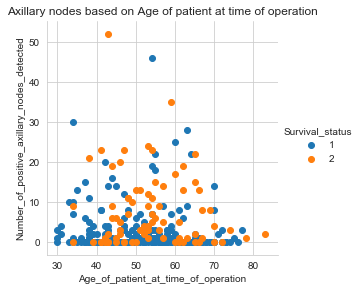

In [86]:
sns.set_style("whitegrid");
sns.FacetGrid(Data, hue="Survival_status", height=4) \
   .map(plt.scatter,"Age_of_patient_at_time_of_operation","Number_of_positive_axillary_nodes_detected") \
   .add_legend();
plt.title("Axillary nodes based on Age of patient at time of operation")
plt.show();

### Observation:
* Maximum chances of survival when ungergo surgery at early stage ie; if axillary node is <=20.

## Pair plots to understand the relationship between features.

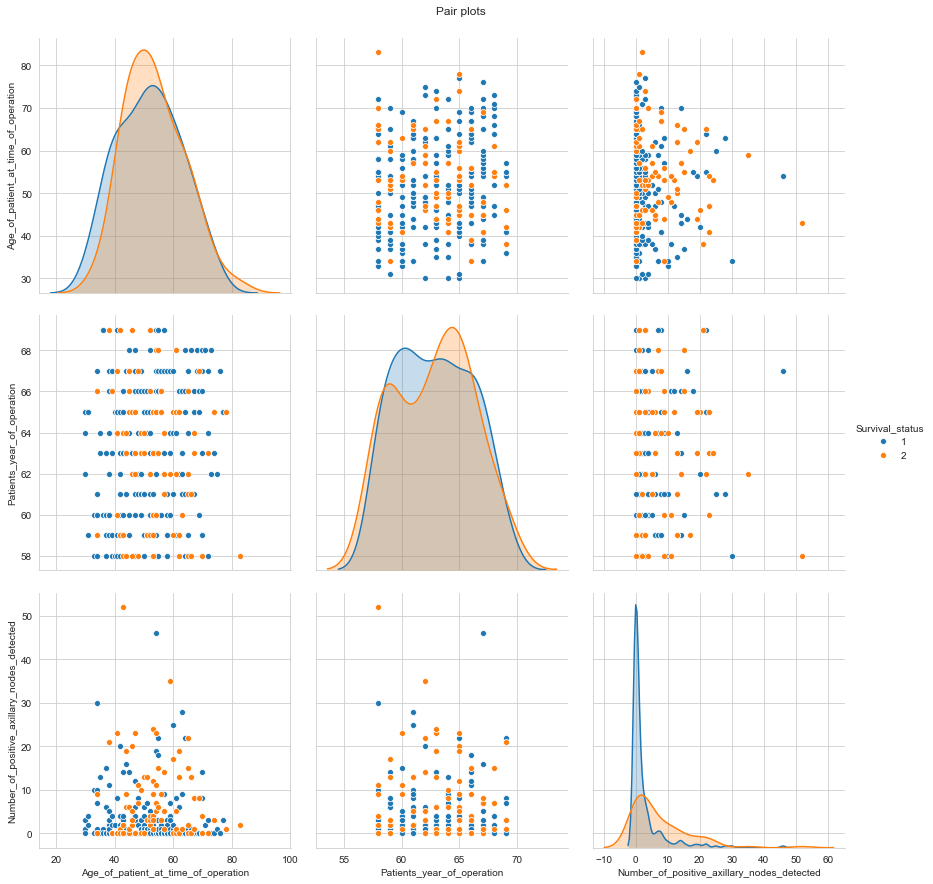

In [138]:
#Data=Data[['Age_of_patient_at_time_of_operation', 'Patients_year_of_operation',
 #      'Number_of_positive_axillary_nodes_detected']]
    
    
import warnings;
warnings.filterwarnings("ignore")
sns.set_style("whitegrid");
sns.pairplot(Data, hue="Survival_status",vars=['Age_of_patient_at_time_of_operation', 'Patients_year_of_operation',
     'Number_of_positive_axillary_nodes_detected'] ,height=4);
plt.suptitle("Pair plots",y=1.02)
plt.show();

## Observations:
* Graph of Number of positive axillary nodes detected Vs Age of patient is helpful parameter and we can see certain patterns in it.
* Graph of Number of positive axillary nodes detected Vs patients year of operation is helpful parameter and we can see certain patterns in it.

In [114]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of positive axillary nodes detected 
import numpy as np
Data_Survived= Data.loc[Data["Survival_status"] == 1];
Data_notsurvived = Data.loc[Data["Survival_status"]== 2];


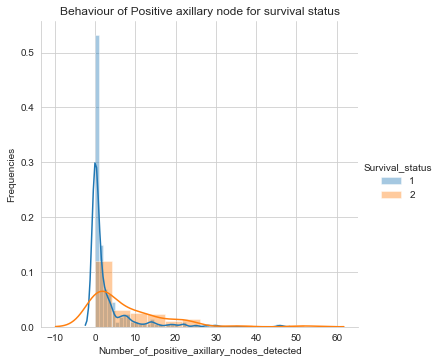

In [116]:
# Plotting PDF and CDF

sns.FacetGrid(Data, hue="Survival_status", height=5) \
   .map(sns.distplot, "Number_of_positive_axillary_nodes_detected") \
   .add_legend();
plt.title("Behaviour of Positive axillary node for survival status")
plt.ylabel("Frequencies")
plt.show();

## Observations:
* Probability dentisity graph of survived patients are having positive axillary nodes in range of -5 to 20 .

* Probability dentisity graph of not survived patients are having positive axillary nodes in range of -10 to 30 majorly  .

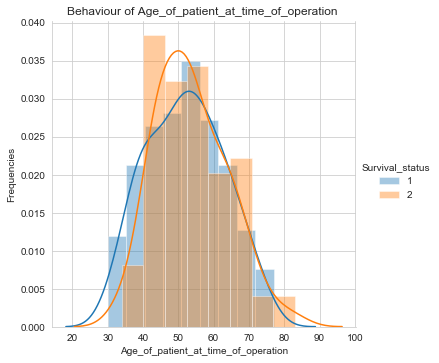

In [117]:
sns.FacetGrid(Data, hue="Survival_status", height=5) \
   .map(sns.distplot, "Age_of_patient_at_time_of_operation") \
   .add_legend();
plt.title("Behaviour of Age_of_patient_at_time_of_operation ")
plt.ylabel("Frequencies")
plt.show();

## Observations:
* The survival rate is more if the age of patient at time of operation is near 15 to 35.

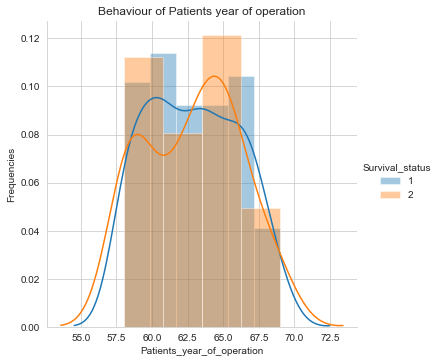

In [119]:
sns.FacetGrid(Data, hue="Survival_status", height=5) \
   .map(sns.distplot, "Patients_year_of_operation") \
   .add_legend();
plt.title("Behaviour of Patients year of operation")
plt.ylabel("Frequencies")
plt.show();

## Observation:
* This variable is mostly overlapping with both the survival status . Not a informative feature.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


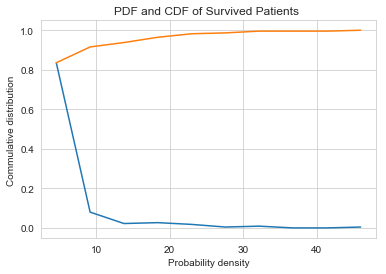

In [125]:
#Plot CDF of Number_of_positive_axillary_nodes_detected

counts, bin_edges = np.histogram(Data_Survived['Number_of_positive_axillary_nodes_detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("PDF and CDF of Survived Patients ")
plt.xlabel("Probability density")
plt.ylabel("Commulative distribution ")
plt.show();

## Observations:
* 82% Patients are survived when, the axllilary nodes detected value is less than or equal to 10

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


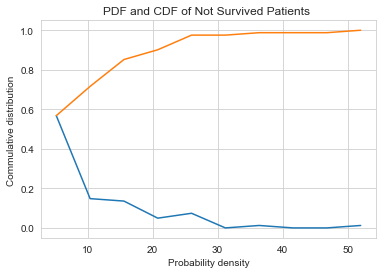

In [126]:
counts, bin_edges = np.histogram(Data_notsurvived['Number_of_positive_axillary_nodes_detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("PDF and CDF of Not Survived Patients ")
plt.xlabel("Probability density")
plt.ylabel("Commulative distribution ")


plt.show();

## Observations :
* 80 % patients are were not survived when axilary node value is greater than or equal to 15.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


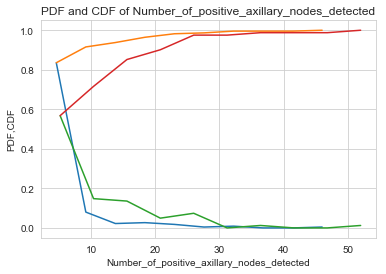

In [61]:
# Plots of CDF of axillary nodesfor various survival status.

# Patients survived

counts, bin_edges = np.histogram(Data_Survived['Number_of_positive_axillary_nodes_detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Patients Not survived 
counts, bin_edges = np.histogram(Data_notsurvived['Number_of_positive_axillary_nodes_detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("PDF and CDF of Number_of_positive_axillary_nodes_detected")
plt.xlabel("Number_of_positive_axillary_nodes_detected")
plt.ylabel("PDF,CDF")
plt.show();




## Observations:
* If the threshold value we set is 10 , 90% patients will survive 

In [62]:
#Mean, Variance and Std-dev
print("Means are: ")
print(np.mean(Data_Survived["Number_of_positive_axillary_nodes_detected"]))
print(np.mean(Data_notsurvived["Number_of_positive_axillary_nodes_detected"]))

print("\nMean Age of patient")
print(np.mean(Data_Survived["Age_of_patient_at_time_of_operation"]))
print(np.mean(Data_notsurvived["Age_of_patient_at_time_of_operation"]))

print("\nStdev's are: ")
print(np.std(Data_Survived["Number_of_positive_axillary_nodes_detected"]))
print(np.std(Data_notsurvived["Number_of_positive_axillary_nodes_detected"]))



Means are: 
2.7911111111111113
7.45679012345679

Mean Age of patient
52.01777777777778
53.67901234567901

Stdev's are: 
5.857258449412131
9.128776076761632


In [63]:
#Median
print("\nMedians's are: ")
print(np.median(Data_Survived["Number_of_positive_axillary_nodes_detected"]))
print(np.median(Data_notsurvived["Number_of_positive_axillary_nodes_detected"]))



Medians's are: 
0.0
4.0


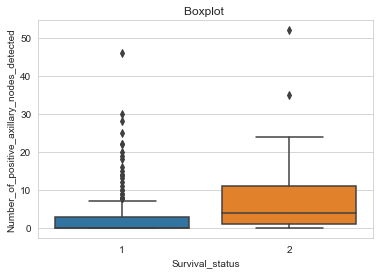

In [129]:
# boxplot and whiskers:
import warnings;
warnings.filterwarnings("ignore")
sns.boxplot(x='Survival_status',y='Number_of_positive_axillary_nodes_detected', data=Data)
plt.title("Boxplot ")
plt.show();



## Observations:
* From the above boxplot and whiskers plot graphs:
** There are various outlier obervations which lies outside the maximum limit.
** Patients who are survived are mainly when the value of axillary positive node detected is 10.
** Hence is we set the threshold value 10 then chances of survival is more.

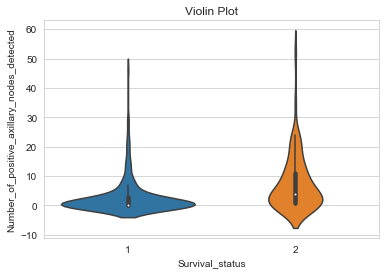

In [137]:
# Voilin plot:
sns.violinplot(x="Survival_status", y="Number_of_positive_axillary_nodes_detected", data=Data, size=8)
plt.title("Violin Plot")
plt.show()

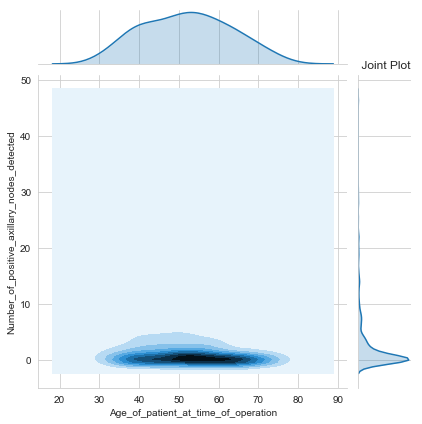

In [136]:
#2D Density plot, contors-plot
sns.jointplot(x="Age_of_patient_at_time_of_operation", y="Number_of_positive_axillary_nodes_detected", data=Data_Survived, kind="kde");
plt.title(" Joint Plot",y=4)
plt.show();



## Observations:
** There are dense countouring at inner side by the graph and near to value of axillary positive node detected 10. hence possibility of patients survival is more in such cases.


# Final Conclusions:
## Survived Patients:
* Patients with age limit 52.
* Patients who have axillary positive node value 10 or less have more possibility rate of survival.
* 90 % of patients have survived for 5 years with above scenario's.


In [17]:
# Import the package 
import pandas as pd
df=pd.DataFrame({'a1':[('b1','c1'), ('d1','e1')],
                 'a2':[('b2','c2'), ('d2','e2')],
                 'a3':[('b3','c3'),('d3','e2')]})
df
df.transpose()
# this will give the values based on variable
df.melt()

,variable,value
0,a1,"(b1, c1)"
1,a1,"(d1, e1)"
2,a2,"(b2, c2)"
3,a2,"(d2, e2)"
4,a3,"(b3, c3)"
5,a3,"(d3, e2)"
